# Classification
- Naive Bayes
- Decision Tree
- Random Forest
- Support Vector Machine

In [163]:
# import package
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn import datasets
from sklearn.model_selection import train_test_split

from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC

# untuk visualisasi decision tree
from sklearn import tree
import pydotplus
from six import StringIO
from IPython.display import Image

# Naive Bayes
asumsi kalau setiap fitur berdisi secara independen. mudah dan cepat untuk di implementasikan.

In [4]:
# siapin data
weather=['Sunny','Sunny','Overcast','Rainy','Rainy','Rainy','Overcast','Sunny','Sunny', 'Rainy','Sunny','Overcast','Overcast','Rainy']

temp=['Hot','Hot','Hot','Mild','Cool','Cool','Cool','Mild','Cool','Mild','Mild','Mild','Hot','Mild']

play=['No','No','Yes','Yes','Yes','No','Yes','No','Yes','Yes','Yes','Yes','Yes','No']

print(len(weather), len(play))

14 14


In [6]:
# karena datanya berbentuk text, kita encoding dulu
encoder1 = LabelEncoder()
cuaca = encoder1.fit_transform(weather)

encoder2 = LabelEncoder()
panas = encoder2.fit_transform(temp)

encoder3 = LabelEncoder()
target = encoder3.fit_transform(play)

print("class weather:", encoder1.classes_)
print("class temp:", encoder2.classes_)
print("class play:", encoder3.classes_)

class weather: ['Overcast' 'Rainy' 'Sunny']
class temp: ['Cool' 'Hot' 'Mild']
class play: ['No' 'Yes']


In [10]:
print("weather:", cuaca)
print("temp:   ", panas)
print("play:   ", target)

weather: [2 2 0 1 1 1 0 2 2 1 2 0 0 1]
temp:    [1 1 1 2 0 0 0 2 0 2 2 2 1 2]
play:    [0 0 1 1 1 0 1 0 1 1 1 1 1 0]


In [14]:
df = pd.DataFrame({"weather": weather,
                  "temperature": temp,
                  "play": play})
df.head(2)

,weather,temperature,play
0,Sunny,Hot,No
1,Sunny,Hot,No


In [16]:
df_encoded = pd.DataFrame({"weather": cuaca,
                  "temperature": panas,
                  "play": target})
df_encoded.head(2)

,weather,temperature,play
0,2,1,0
1,2,1,0


In [17]:
# fitur jadi satu, target sendiri
fitur = list(zip(cuaca, panas))
fitur

[(2, 1),
 (2, 1),
 (0, 1),
 (1, 2),
 (1, 0),
 (1, 0),
 (0, 0),
 (2, 2),
 (2, 0),
 (1, 2),
 (2, 2),
 (0, 2),
 (0, 1),
 (1, 2)]

In [18]:
target

array([0, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0], dtype=int64)

In [22]:
# membuat model
model_nb = GaussianNB()
# train, fit model
model_nb.fit(fitur, target)

GaussianNB()

In [25]:
# bikin prediksi
y_pred = model_nb.predict(fitur)

#evaluasi ke akuratan model
print("score:", model_nb.score(fitur, target))
print("acc score:", accuracy_score(y_pred, target))
print("classification report")
print(classification_report(y_pred, target))
print("confusion matrix")
print(confusion_matrix(y_pred, target))

score: 0.7142857142857143
acc score: 0.7142857142857143
classification report
              precision    recall  f1-score   support

           0       0.60      0.60      0.60         5
           1       0.78      0.78      0.78         9

    accuracy                           0.71        14
   macro avg       0.69      0.69      0.69        14
weighted avg       0.71      0.71      0.71        14

confusion matrix
[[3 2]
 [2 7]]


# Naive Bayes dengan 3+ target

In [27]:
# siapin data
wine = datasets.load_wine()

In [34]:
# eksplor data
print(len(wine.feature_names), "fitur:", wine.feature_names)

13 fitur: ['alcohol', 'malic_acid', 'ash', 'alcalinity_of_ash', 'magnesium', 'total_phenols', 'flavanoids', 'nonflavanoid_phenols', 'proanthocyanins', 'color_intensity', 'hue', 'od280/od315_of_diluted_wines', 'proline']


In [35]:
print(len(wine.target_names),"target:", wine.target_names)

3 target: ['class_0' 'class_1' 'class_2']


In [36]:
print("bentuk datanya berapa baris dan kolom:")
print(wine.data.shape)

bentuk datanya berapa baris dan kolom:
(178, 13)


In [43]:
print("detail target:")
print(wine.target.shape)

detail target:
(178,)


In [45]:
df = pd.DataFrame(wine.data)
df.columns = wine.feature_names
df["wine_type"] = wine.target
df

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline,wine_type
0,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065.0,0
1,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050.0,0
2,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185.0,0
3,14.37,1.95,2.50,16.8,113.0,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480.0,0
4,13.24,2.59,2.87,21.0,118.0,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
173,13.71,5.65,2.45,20.5,95.0,1.68,0.61,0.52,1.06,7.70,0.64,1.74,740.0,2
174,13.40,3.91,2.48,23.0,102.0,1.80,0.75,0.43,1.41,7.30,0.70,1.56,750.0,2
175,13.27,4.28,2.26,20.0,120.0,1.59,0.69,0.43,1.35,10.20,0.59,1.56,835.0,2
176,13.17,2.59,2.37,20.0,120.0,1.65,0.68,0.53,1.46,9.30,0.60,1.62,840.0,2


In [49]:
# split datanya jadi training dan testing data
X_train, X_test, y_train, y_test = train_test_split(
                wine.data, wine.target,
                test_size=0.3, #30% utk test, 70% utk training
                )

In [50]:
# buat model
gnb = GaussianNB()
#training model
gnb.fit(X_train, y_train)

GaussianNB()

In [52]:
# bikin prediksi
hasil_prediksi = gnb.predict(X_test)

In [55]:
# cek akurasi modelnya,
# bandingin hasil prediksi test data dengan target asli test data

pd.DataFrame({"asli":y_test, "prediksi":hasil_prediksi}).head()

,asli,prediksi
0,0,0
1,0,0
2,0,0
3,0,1
4,2,2


In [56]:
print("score akurasi model")
print(accuracy_score(y_test, hasil_prediksi))

score akurasi model
0.9629629629629629


In [57]:
print("classification report")
print(classification_report(y_test, hasil_prediksi))

classification report
              precision    recall  f1-score   support

           0       1.00      0.90      0.95        21
           1       0.90      1.00      0.95        19
           2       1.00      1.00      1.00        14

    accuracy                           0.96        54
   macro avg       0.97      0.97      0.97        54
weighted avg       0.97      0.96      0.96        54



In [60]:
print("confusion matrix")
cm = confusion_matrix(y_test, hasil_prediksi)
print(cm)

confusion matrix
[[19  2  0]
 [ 0 19  0]
 [ 0  0 14]]


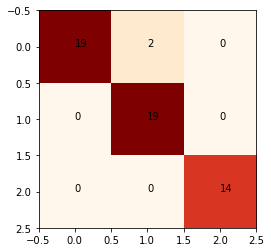

In [63]:
plt.imshow(cm, cmap="OrRd")

for i in range(3):
    for j in range(3):
        plt.text(i,j,cm[j,i])

# Decision Tree

In [70]:
# ambil data
pima = pd.read_csv("data/diabetes.csv")
pima.head(2)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0


In [71]:
# ganti nama kolom
pima.columns = ['pregnant', 'glucose','bp','skin','insulin',
               'bmi','pedigree','age','label']
pima.head()

,pregnant,glucose,bp,skin,insulin,bmi,pedigree,age,label
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [72]:
# eksplorasi data
pima.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   pregnant  768 non-null    int64  
 1   glucose   768 non-null    int64  
 2   bp        768 non-null    int64  
 3   skin      768 non-null    int64  
 4   insulin   768 non-null    int64  
 5   bmi       768 non-null    float64
 6   pedigree  768 non-null    float64
 7   age       768 non-null    int64  
 8   label     768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [74]:
for col in ['pregnant', 'glucose','bp','skin','insulin',
               'bmi','pedigree','age','label']:
    pima[col]=pd.to_numeric(pima[col], errors='coerce')
    
pima.dropna(inplace=True)

In [75]:
pima.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   pregnant  768 non-null    int64  
 1   glucose   768 non-null    int64  
 2   bp        768 non-null    int64  
 3   skin      768 non-null    int64  
 4   insulin   768 non-null    int64  
 5   bmi       768 non-null    float64
 6   pedigree  768 non-null    float64
 7   age       768 non-null    int64  
 8   label     768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 60.0 KB


In [76]:
# udah di clean, pisahin data fitur dan target
fitur = ['pregnant', 'glucose','bp','skin','insulin',
               'bmi','pedigree','age']
X = pima[fitur]
y = pima['label']

print(X.shape)
print(y.shape)

(768, 8)
(768,)


In [77]:
# kita split data jadi training dan testing
X_train, X_test, y_train, y_test = train_test_split(X,y,
                                test_size=0.3)
# 30% data dipakai untuk testing, 70% untuk training

In [78]:
# bikin dan training model
model_dt = DecisionTreeClassifier()
model_dt.fit(X_train, y_train)

# bikin prediksi
y_pred = model_dt.predict(X_test)

In [79]:
# cek akurasi model
print(accuracy_score(y_test,y_pred))

0.6926406926406926


In [80]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.79      0.72      0.75       148
           1       0.56      0.65      0.60        83

    accuracy                           0.69       231
   macro avg       0.67      0.68      0.68       231
weighted avg       0.71      0.69      0.70       231



In [81]:
print(confusion_matrix(y_test,y_pred))

[[106  42]
 [ 29  54]]


# Visualisasi Decision Tree

pip install graphviz  
pip install pydotplus

tambahan windows, install graphviz dari [https://graphviz.gitlab.io/_pages/Download/Download_windows.html]  
lalu import os seperti dibawah, dan tambahkan path untuk ke graphviz punya bin

In [83]:
import os
os.environ["PATH"] += os.pathsep + 'C:\Program Files\Graphviz/bin/'

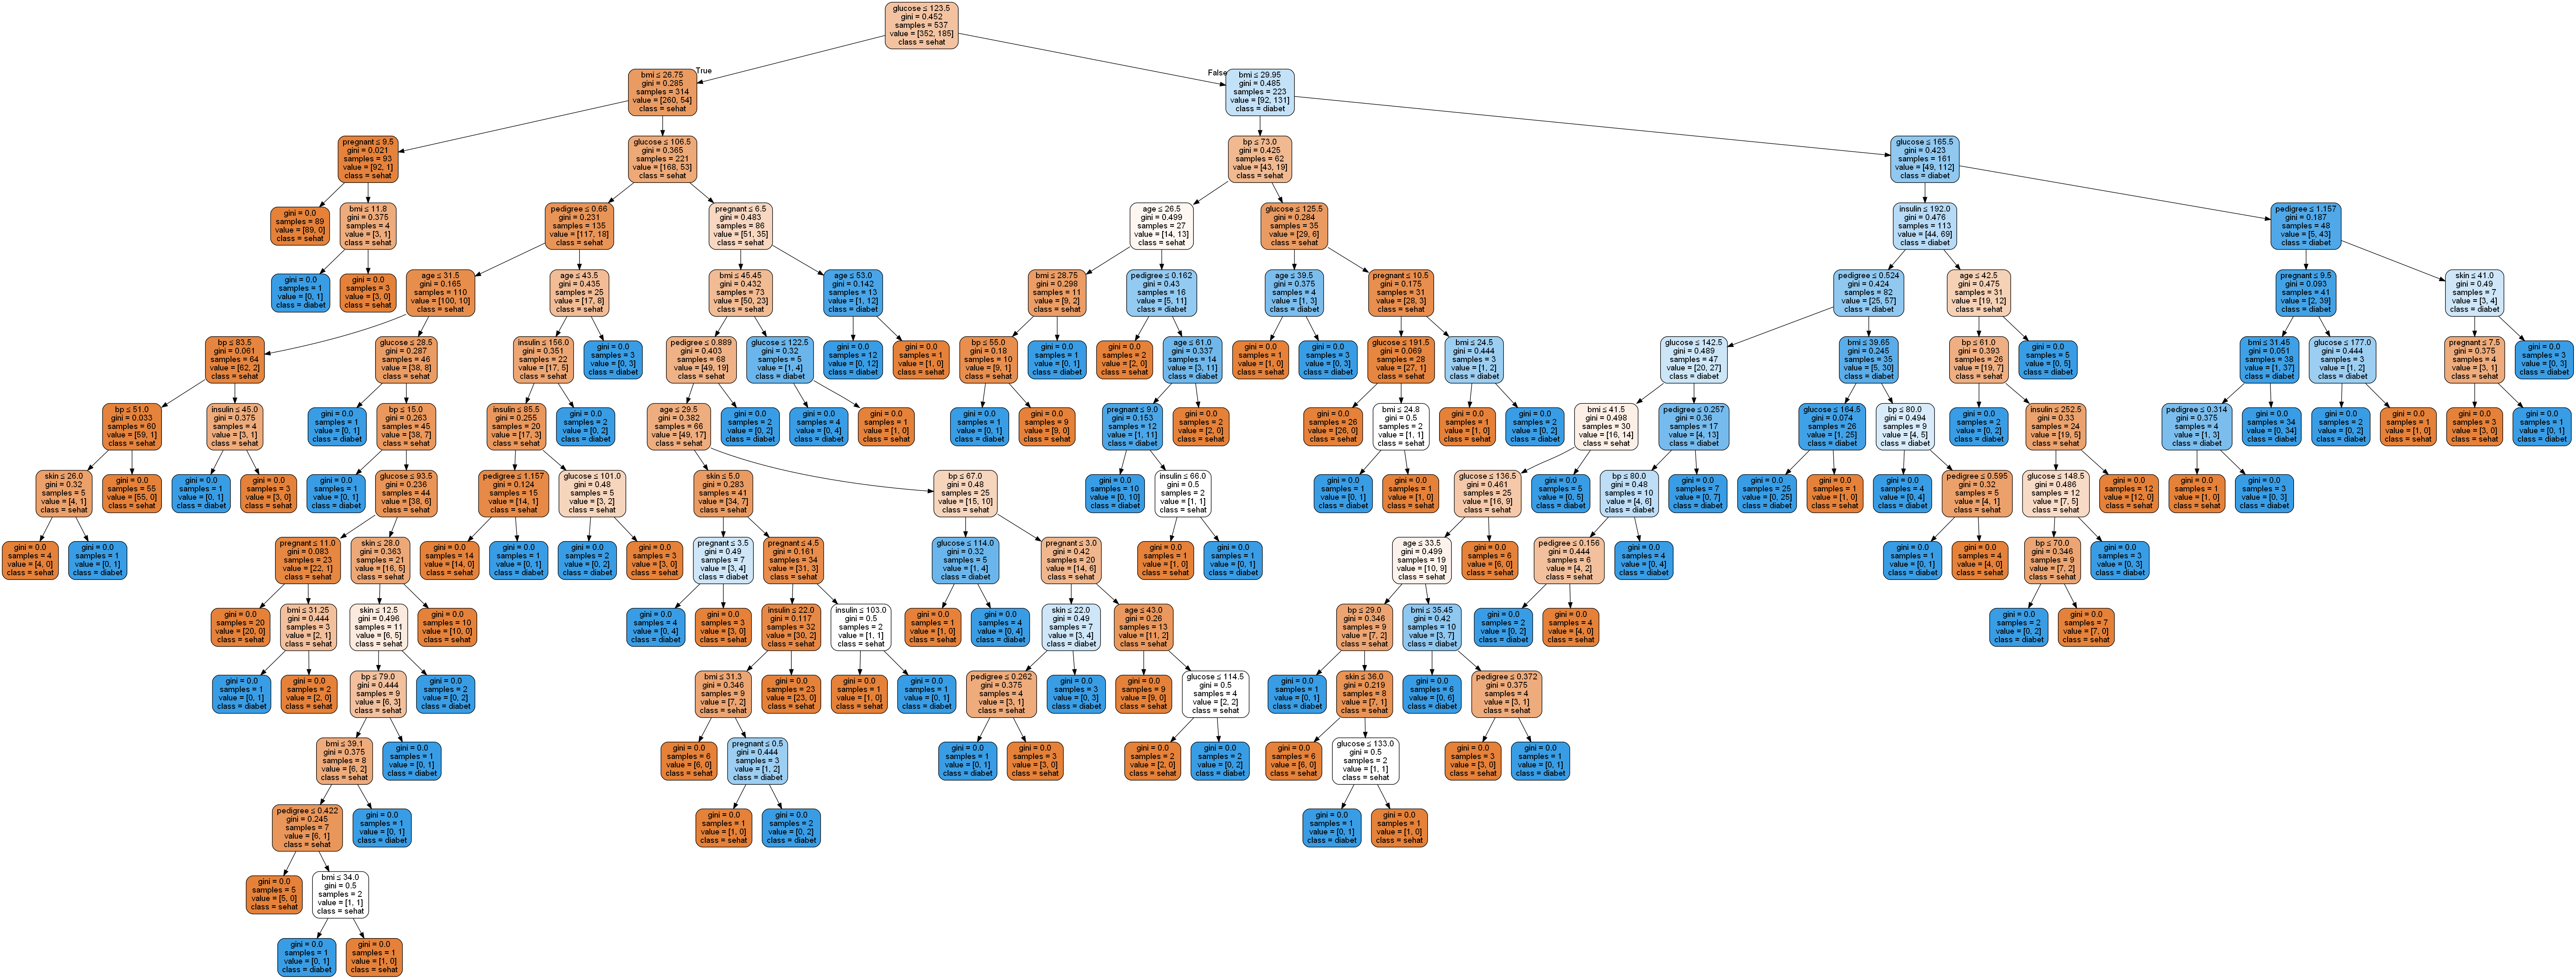

In [86]:
dot_data = StringIO()
tree.export_graphviz(model_dt,
                    out_file=dot_data,
                    class_names=['sehat','diabet'],
                    feature_names=fitur,
                    filled=True,
                    rounded=True,
                    special_characters=True)
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())
Image(graph.create_png())

In [103]:
# optimisasi decision tree nya dengan opsi lain
model_dt2 = DecisionTreeClassifier(criterion="entropy",
                                  max_depth=3)
model_dt2.fit(X_train, y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=3)

In [104]:
# bikin prediksi
y_pred2 = model_dt2.predict(X_test)

# cek akurasi
print(accuracy_score(y_test,y_pred2))

0.696969696969697


In [105]:
print(classification_report(y_test,y_pred2))

              precision    recall  f1-score   support

           0       0.77      0.75      0.76       148
           1       0.57      0.60      0.59        83

    accuracy                           0.70       231
   macro avg       0.67      0.68      0.67       231
weighted avg       0.70      0.70      0.70       231



In [106]:
print(confusion_matrix(y_test,y_pred2))

[[111  37]
 [ 33  50]]


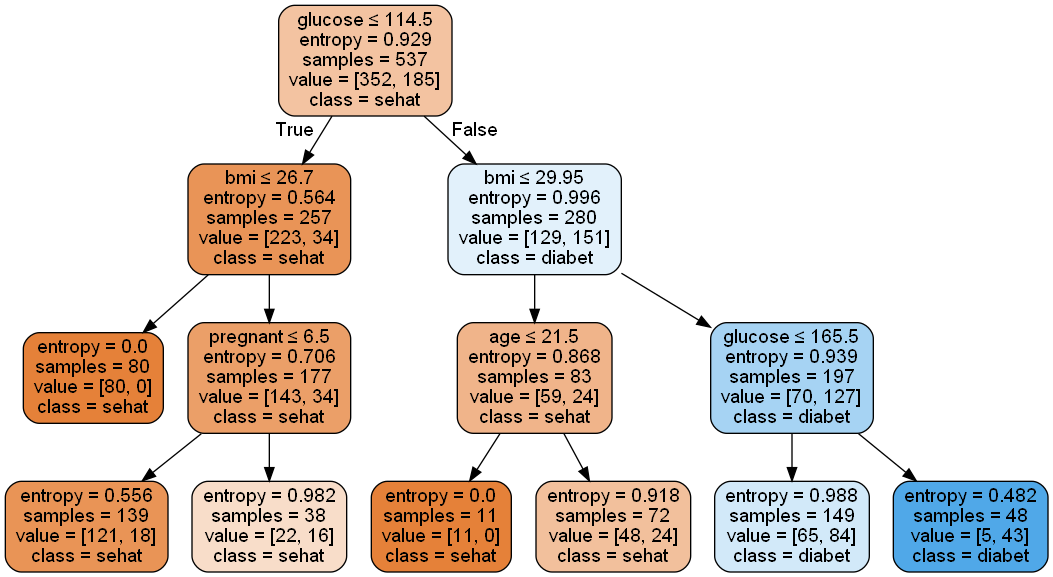

In [107]:
dot_data = StringIO()
tree.export_graphviz(model_dt2,
                    out_file=dot_data,
                    class_names=['sehat','diabet'],
                    feature_names=fitur,
                    filled=True,
                    rounded=True,
                    special_characters=True)
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())
Image(graph.create_png())

# Random Forest
kalau kita buat banyak decision tree berbeda (setiap tree ambil sample dari training data) lalu setiap tree tersebut voting untuk mencapai sebuah prediksi

In [144]:
# siapin data
iris = datasets.load_iris()

# eksplorasi data
print("jumlah data", iris.data.shape)
print("jumlah target", iris.target.shape)

# nama fitur2nya apa saja
print("fitur", iris.feature_names)

# target/ labelnya apa saja
print("target", iris.target_names)

jumlah data (150, 4)
jumlah target (150,)
fitur ['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']
target ['setosa' 'versicolor' 'virginica']


In [145]:
# siapin datanya jadi training dan testing data
X = iris.data
y = iris.target
X_train, X_test, y_train, y_test = train_test_split(X, y,
                            test_size=0.3, random_state=5)
# 30% test data, 70% training data

In [146]:
# bikin model
model_rf = RandomForestClassifier()
# training model, fit
model_rf.fit(X_train, y_train)

RandomForestClassifier()

In [147]:
# bikin prediksi
y_pred = model_rf.predict(X_test)

In [148]:
# evaluasi ke akuratan model nya
print("skor:", accuracy_score(y_test, y_pred))
print("Classification Report")
print(classification_report(y_test,y_pred))
print("Confusion Matrix")
print(confusion_matrix(y_test, y_pred))

skor: 0.9333333333333333
Classification Report
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        15
           1       0.88      0.94      0.91        16
           2       0.92      0.86      0.89        14

    accuracy                           0.93        45
   macro avg       0.94      0.93      0.93        45
weighted avg       0.93      0.93      0.93        45

Confusion Matrix
[[15  0  0]
 [ 0 15  1]
 [ 0  2 12]]


# melihat fitur yang penting

In [149]:
df_fitur = pd.DataFrame({"fitur":iris.feature_names,
             "importance": model_rf.feature_importances_})
df_fitur

,fitur,importance
0,sepal length (cm),0.123691
1,sepal width (cm),0.022163
2,petal length (cm),0.374461
3,petal width (cm),0.479685


In [150]:
df_fitur.sort_values(by="importance", ascending=False, inplace=True)
df_fitur

,fitur,importance
3,petal width (cm),0.479685
2,petal length (cm),0.374461
0,sepal length (cm),0.123691
1,sepal width (cm),0.022163


<AxesSubplot:xlabel='importance', ylabel='fitur'>

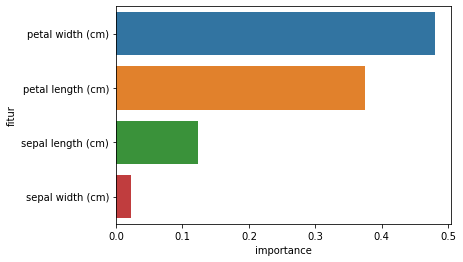

In [151]:
# plot secara visual level kepentingan tiap fitur
sns.barplot(y=df_fitur['fitur'], 
            x=df_fitur['importance'])

In [152]:
df_iris = pd.DataFrame(iris.data)
df_iris.columns = df_fitur['fitur']
print(df_iris.shape)
df_iris.head(2)

(150, 4)


fitur,petal width (cm),petal length (cm),sepal length (cm),sepal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2


In [153]:
# bikin dataset baru dengan 3 fitur terpenting saja
X = df_iris[['petal length (cm)','petal width (cm)', 'sepal length (cm)']]
y = iris.target
print(X.shape)
print(y.shape)

(150, 3)
(150,)


In [154]:
# set training dan testing data baru
X_train, X_test, y_train, y_test = train_test_split(X, y,
                            test_size=0.3, random_state=5)

In [155]:
# model random forest baru
model_rf = RandomForestClassifier()
#training
model_rf.fit(X_train,y_train)

RandomForestClassifier()

In [156]:
# bikin prediksi
y_pred = model_rf.predict(X_test)

In [157]:
# cek akurasi
print("skor:", accuracy_score(y_test, y_pred))
print("Classification Report")
print(classification_report(y_test,y_pred))
print("Confusion Matrix")
print(confusion_matrix(y_test, y_pred))

skor: 0.9555555555555556
Classification Report
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        15
           1       1.00      0.88      0.93        16
           2       0.88      1.00      0.93        14

    accuracy                           0.96        45
   macro avg       0.96      0.96      0.96        45
weighted avg       0.96      0.96      0.96        45

Confusion Matrix
[[15  0  0]
 [ 0 14  2]
 [ 0  0 14]]


# Support Vector Machine
mencari garis pemisah yang memisahkan label, dengan margin tertinggi. margin dihitung dari jarak label1 terdekat ke garis + jarak label2 terdekat ke garis. titik data terdekat ke garis diberi nama support vector.

Untuk titik data yang tidak bisa dipisah dengan garis lurus, bisa di ubah dulu plot nya (ditambahkan dimensi) dengan kernel polynomial atau radial. tidak harus kernel linear.

In [159]:
# siapin data
cancer = datasets.load_breast_cancer()
# eksplorasi data
print(len(cancer.feature_names), cancer.feature_names)

30 ['mean radius' 'mean texture' 'mean perimeter' 'mean area'
 'mean smoothness' 'mean compactness' 'mean concavity'
 'mean concave points' 'mean symmetry' 'mean fractal dimension'
 'radius error' 'texture error' 'perimeter error' 'area error'
 'smoothness error' 'compactness error' 'concavity error'
 'concave points error' 'symmetry error' 'fractal dimension error'
 'worst radius' 'worst texture' 'worst perimeter' 'worst area'
 'worst smoothness' 'worst compactness' 'worst concavity'
 'worst concave points' 'worst symmetry' 'worst fractal dimension']


In [160]:
print(len(cancer.target_names), cancer.target_names)

2 ['malignant' 'benign']


In [161]:
print (cancer.data.shape)

(569, 30)


In [162]:
# split data jadi testing dan training
X = cancer.data
y = cancer.target
X_train, X_test, y_train, y_test = train_test_split(X, y,
                            test_size=0.3,
                            random_state=109)

In [164]:
# bikin model & training model
model = SVC(kernel='linear')
model.fit(X_train, y_train)

SVC(kernel='linear')

In [165]:
# bikin prediksi
y_pred = model.predict(X_test)

In [166]:
# cek akurasi
print("skor:", accuracy_score(y_test, y_pred))
print("Classification Report")
print(classification_report(y_test,y_pred))
print("Confusion Matrix")
print(confusion_matrix(y_test, y_pred))

skor: 0.9649122807017544
Classification Report
              precision    recall  f1-score   support

           0       0.94      0.97      0.95        63
           1       0.98      0.96      0.97       108

    accuracy                           0.96       171
   macro avg       0.96      0.97      0.96       171
weighted avg       0.97      0.96      0.97       171

Confusion Matrix
[[ 61   2]
 [  4 104]]
